In [47]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPatch

from lowAltitude_classification.gsd_utils import papermode

In [48]:
font_size = 8
papermode(plt, font_size, has_latex=True)

In [49]:
class HandlerSquare(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = xdescent + 0.5 * (width - height), ydescent
        p = mpatches.Rectangle(xy=center, width=height,
                               height=height, angle=0.0)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

In [50]:
annotations = []
with open('results/preds/annotations/1.txt', 'r') as f:
    for line in f.readlines():
        name = line.split(',')[0].split(':')[1].split('(')[0].strip()
        color = line.split(':')[-1].strip()[1:-1].split(',')
        color = [int(c) for c in color]
        annotations.append([name, color])

In [51]:
latin_to_common = {}
common_to_latin = {}
with open('results/preds/latin_common.txt', 'r') as f:
    for line in f.readlines():
        latin, common = [x.strip() for x in line.split('&')]
        latin_to_common[latin] = common
        common_to_latin[common] = latin
print(latin_to_common)

{'Bryophyta': 'Moss', 'Polypodiopsida': 'Fern', 'Abies': 'Fir', 'Amelanchier': 'Serviceberry', 'Carex': 'Sedge', 'Epilobium': 'Willowherb', 'Picea': 'Spruce', 'Vaccinium': 'Blueberry', 'Viburnum': 'Viburnum', 'Acer rubrum': 'Red Maple', 'Acer spicatum': 'Mountain Maple', 'Betula alleghaniensis': 'Yellow Birch', 'Betula papyrifera': 'Paper Birch', 'Chamaedaphne calyculata': 'Leatherleaf', 'Kalmia angustifolia': 'Sheep Laurel', 'Pinus banksiana': 'Jack Pine', 'Populus tremuloides': 'Trembling Aspen', 'Prunus pensylvanica': 'Fire Cherry', 'Rhododendron groenlandicum': 'Bog Labrador Tea', 'Rubus idaeus': 'Red Raspberry', 'Sorbus americana': 'American Mountain-Ash', 'Taxus canadensis': 'Canadian Yew', 'Background': 'Background', 'Dead Trees': 'Dead Trees'}


[['American Mountain-Ash', [0, 128, 0]], ['Background', [128, 128, 128]], ['Dead Trees', [128, 128, 0]], ['Fir', [0, 255, 255]], ['Mountain Maple', [128, 128, 0]], ['Paper Birch', [255, 128, 0]], ['Yellow Birch', [255, 128, 255]]]


/tmp/ipykernel_267413/81434688.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  legend_fig.show()
/tmp/ipykernel_267413/81434688.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


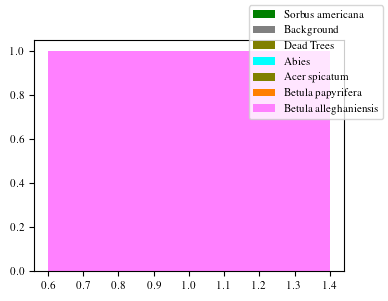

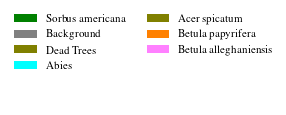

In [52]:
# Creating the original plot
fig, ax = plt.subplots(figsize=(4, 3))

print(annotations)
for name, color in annotations:
    name = common_to_latin[name]
    ax.bar(1, 1, color=[c / 255 for c in color], label=name)

legend = fig.legend()
fig.canvas.draw()
legend_bbox = legend.get_tightbbox(fig.canvas.get_renderer())
legend_bbox = legend_bbox.transformed(fig.dpi_scale_trans.inverted())
legend_fig, legend_ax = plt.subplots(figsize=(legend_bbox.width, legend_bbox.height))

legend_squared = legend_ax.legend(
    *ax.get_legend_handles_labels(),
    bbox_to_anchor=(0, 0, 1, 1),
    bbox_transform=legend_fig.transFigure,
    frameon=False,
    fancybox=None,
    shadow=False,
    ncol=2,
    # mode='expand',
)
legend_ax.axis('off')
legend_fig.show()
legend_fig.savefig('results/legend.pdf', bbox_inches='tight')

fig.show()

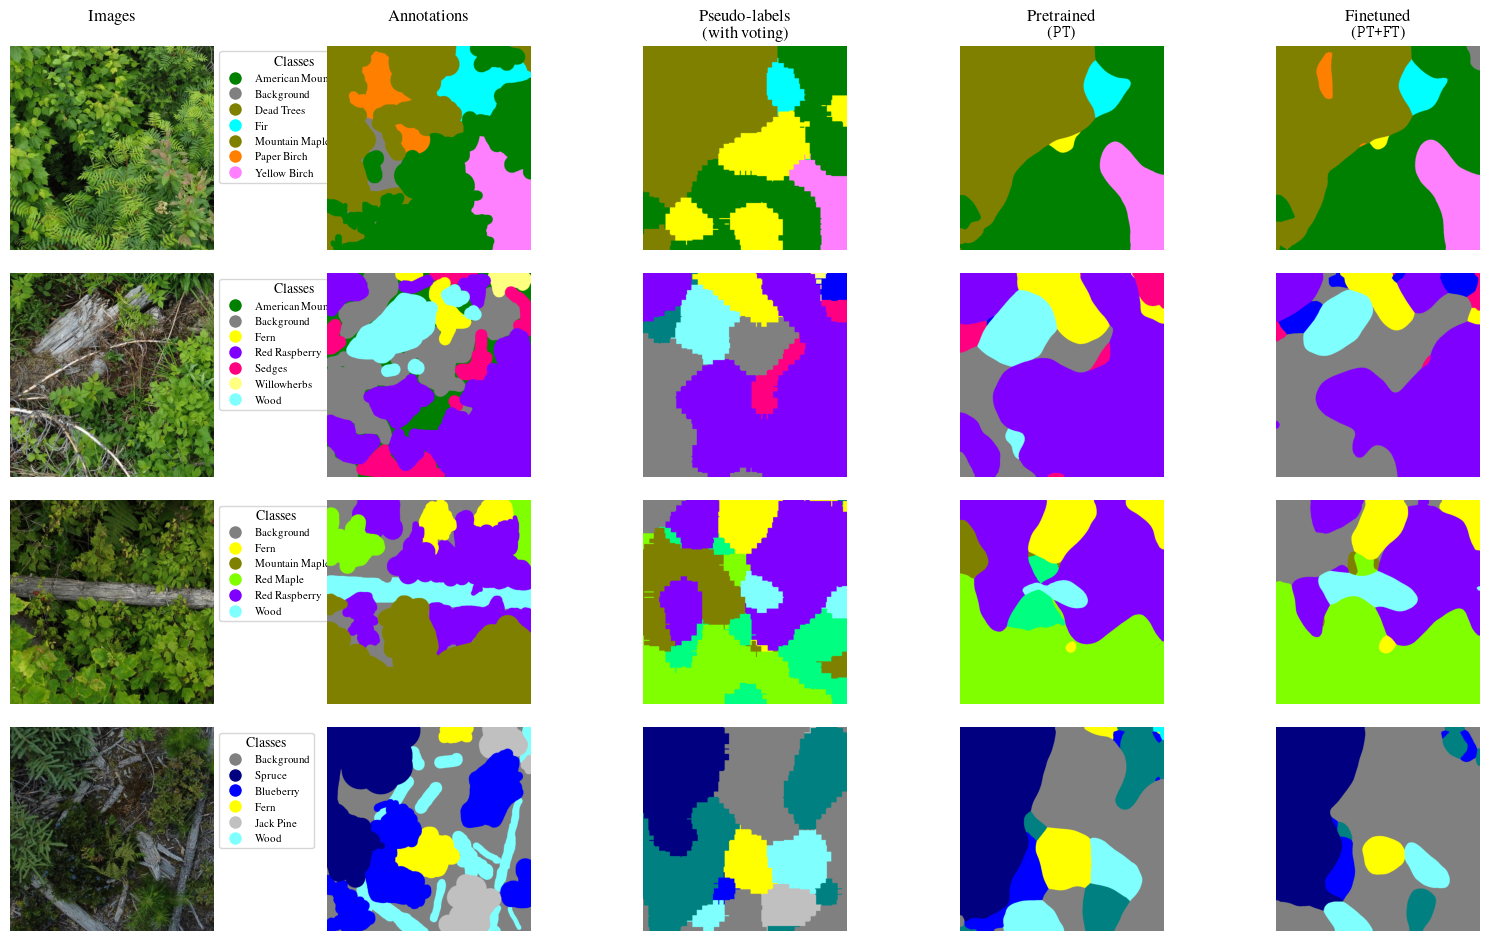

In [54]:
from matplotlib import image as mpimg

width = 15
height = 12

titles = ['Images\n', 'Annotations\n', 'Pseudo-labels'"\n"'(with voting)', r'Pretrained'"\n"r'(\texttt{PT})',
          r'Finetuned'"\n"r'(\texttt{PT+FT})']

fig, axs = plt.subplots(4, 5, figsize=(width, height))
for i in range(4):
    for j in range(5):
        ax = axs[i, j]
        ax.axis('off')
        img_path = f'results/preds/{["images", "annotations", "voting", "pt", "pt_ft"][j]}/{i + 1}.{"jpg" if j == 0 else "png"}'
        img = mpimg.imread(img_path)
        ax.imshow(img)

    annotations = []
    with open(f'results/preds/annotations/{i + 1}.txt', 'r') as f:
        for line in f.readlines():
            name = line.split(',')[0].split(':')[1].split('(')[0].strip()
            color = line.split(':')[-1].strip()[1:-1].split(',')
            color = [float(c) / 255 for c in color]
            annotations.append([name, color])

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for
               label, color in annotations]
    axs[i, 0].legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), title='Classes')

for j, title in enumerate(titles):
    axs[0, j].set_title(title, size='large')

fig.subplots_adjust(top=0.99, bottom=0.31, left=0.15, right=0.98, wspace=0.3)
fig.set_size_inches(width, 0.8 * height)
fig.tight_layout()

# fig.set_dpi(1500)
fig.savefig('results/M2F_qualitative.pdf', dpi=5_000)
fig.savefig('results/M2F_qualitative.png')
# fig.show()
